# **Not an ideal network**

In [0]:
# https://keras.io/

#Installs keras library and imports keras module to use it in the subsequent code cells.

#1. "pip" is the default package management system for the software packages written in pyhton.
#   It uses PyPI as the default index to search packages when installing them. 
#2. "keras" is a hight level neural networks API, written in python. It's core data structure is a model.
#   It provides apis to create and configure the models.

#3. Use ! operator to tell colab that, this line is not a Python code, its a command line script. 
#   Hence the below line i.e pip install -q keras is run as command line script instead of python code. 

!pip install -q keras
import keras

In [0]:
#Importing numpy, and apis from keras
#numpy : it is the python package for scientific computing.
#Sequential : It is a type of model availbale in keras. The Sequential model is a linear stack of layers.
#Flatten : Flattens the input into a single dimension array
#Convolution2D : Single convolution layer can be coded using this API. (This API, I could not find in keras documentation.)
#np_utils : Looks like a utility funcitons around numpy. (API not found on keras documentation)
#mnist : keras provides msist dataset api. MNIST is the database of handwritten digits.

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
#Loads the mnist data. load_data() will return the tuple of Numpy arrays
#Below line will create 4 numpy arrays i.e, X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


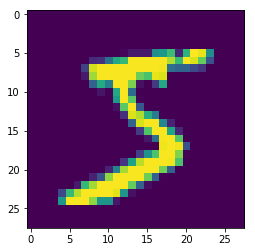

In [117]:
#X_train is a numpy array with shape (60000, 28, 28). 
#Because, MNIST dataset contains 60000 examples in training dataset and 10000 in test dataset. Each image is of 28X28 resolution.
print (X_train.shape)

#Display the firt image in the mnist train dataset, using matplotlib from scikit
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Reshape the 3 dimentional array into a 4 dimentional one. 
#Adding 1, may be because there is only one channel in mnist images, i.e no RGB. Please correct if wrong
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert all the numbers in the train and test data arrays into float32 form and 
#divide them by 255 ( 255 representing brightest intensity pixel value)
#output of this cell is expected to be all number in between 0 and 1s

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [120]:
#This cell is simply slicing the y_train array to display the first 10 numbers in it and its data type. 
#y_train is actually a 1-dimentional array of length 60000. in numpy terms, the shape of y_train is (60000,)
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [122]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [123]:
#Main Model defined in this cell.

from keras.layers import Activation, MaxPooling2D

model = Sequential() 
#Receptive Field here : 1
#Input channel dimensions here : 28 X 28 X 1
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#Receptive Field here : 3
#Input channel dimensions here : 26 X 26 X 32
model.add(Convolution2D(64, 3, 3, activation='relu'))
#Receptive Field here : 5
#Input channel dimensions here : 24 X 24 X 64
model.add(Convolution2D(128, 3, 3, activation='relu'))
#Receptive Field here : 7
#Input channel dimensions here : 22 X 22 X 128
model.add(MaxPooling2D(pool_size=(2, 2)))
#Receptive Field here : 14
#Input channel dimensions here : 11 X 11 X 128
model.add(Convolution2D(256, 3, 3, activation='relu'))
#Receptive Field here : 16
#Input channel dimensions here : 9 X 9 X 256
model.add(Convolution2D(512, 3, 3, activation='relu'))
#Receptive Field here : 18
#Input channel dimensions here : 7 X 7 X 512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
#Receptive Field here : 20
#Input channel dimensions here : 5 X 5 X 1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
#Receptive Field here : 22
#Input channel dimensions here : 3 X 3 X 2048
model.add(Convolution2D(10, 3, 3, activation='relu'))
#Receptive Field here : 24
#Input channel dimensions here : 1 X 1 X 10

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: U

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [125]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 116s 2ms/step - loss: 2.3002 - acc: 0.1003
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 114s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [127]:
print(score)

[2.3025851249694824, 0.098]


In [0]:
y_pred = model.predict(X_test)

In [129]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


**What all is wrong with the model ?**

1. **Max Pool layer is added much earlier in the model here**. Its ideal to add max pool layer after convolution using 512 kernels (this will identify all edges and gradients mostly), when number of kernels is gradually incresed from 32, 63, 128, 256, 512. But here its added right after 3 layers. 
2. After last conv layer, the gobal receptive field is **24**. But our initial image size was 28 X 28. That means, **the network has not seens the whole image.**
3. **After max pool layer, the number of kernels kept increasing**. Its ideal to decrease the channel size to 32 and add more kernels with each layer after that.